In [1]:
# Import dependencies

import pandas as pd
import json
import requests 
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pprint
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.stats as sem
import random
# from api_keys import weather_api_key
# from api_keys import g_key
import time as time
#import wget as wget
random.seed(42)

In [2]:
# Reference to CSV and reading CSV into Pandas DataFrame
csv_path1 = "Resources/country_vaccinations.csv"
csv_path2 = "Resources/gdp-csv.csv"
csv_path3 = "Resources/time_series_covid_19_confirmed.csv"
csv_path4 = "Resources/time_series_covid_19_deaths.csv"
csv_path5 = "Resources/time_series_covid_19_recovered.csv"
csv_path6 = "Resources/WorldPopulation.csv"
csv_path7 = "Resources/country_vaccinations_by_manufacturer.csv"


# merging final combined CSV meta file


country_vaccinations_df = pd.read_csv(csv_path1)
gdp_df = pd.read_csv(csv_path2)
covid_19_confirmed_df = pd.read_csv(csv_path3)
covid_19_deaths_df = pd.read_csv(csv_path4)
covid_19_recovered_df = pd.read_csv(csv_path5)
WorldPopulations_df = pd.read_csv(csv_path6)
country_vaccinations_by_manufacturer_df = pd.read_csv(csv_path7)


In [3]:
country_vaccinations_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2/22/2021,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2/23/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2/24/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2/25/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2/26/2021,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [4]:
gdp_df.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,4/26/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2018.0,2019.0,2020.0
4,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN


In [5]:
 country_vaccinations_df.dropna()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
118,Albania,ALB,2/18/2021,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
200,Albania,ALB,5/11/2021,622507.0,440921.0,181586.0,9548.0,12160.0,21.63,15.32,6.31,4225.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
201,Albania,ALB,5/12/2021,632676.0,444755.0,187921.0,10169.0,10870.0,21.98,15.45,6.53,3777.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
202,Albania,ALB,5/13/2021,638338.0,445402.0,192936.0,5662.0,9445.0,22.18,15.48,6.70,3282.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
203,Albania,ALB,5/14/2021,653330.0,448571.0,204759.0,14992.0,9662.0,22.70,15.59,7.12,3357.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19111,Zimbabwe,ZWE,5/15/2021,793311.0,579769.0,213542.0,18070.0,19353.0,5.34,3.90,1.44,1302.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1395107134...
19112,Zimbabwe,ZWE,5/16/2021,796947.0,581615.0,215332.0,3636.0,16101.0,5.36,3.91,1.45,1083.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1395107134...
19113,Zimbabwe,ZWE,5/17/2021,814258.0,591808.0,222450.0,17311.0,17658.0,5.48,3.98,1.50,1188.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1395107134...
19114,Zimbabwe,ZWE,5/18/2021,831954.0,600579.0,231375.0,17696.0,17455.0,5.60,4.04,1.56,1174.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1395107134...


In [6]:
country_data= country_vaccinations_df[["country","date","iso_code","total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations"]].drop_duplicates
country_data()


,country,date,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
0,Afghanistan,2/22/2021,AFG,0.0,0.0,NaN,NaN,NaN
1,Afghanistan,2/23/2021,AFG,NaN,NaN,NaN,NaN,1367.0
2,Afghanistan,2/24/2021,AFG,NaN,NaN,NaN,NaN,1367.0
3,Afghanistan,2/25/2021,AFG,NaN,NaN,NaN,NaN,1367.0
4,Afghanistan,2/26/2021,AFG,NaN,NaN,NaN,NaN,1367.0
...,...,...,...,...,...,...,...,...
19111,Zimbabwe,5/15/2021,ZWE,793311.0,579769.0,213542.0,18070.0,19353.0
19112,Zimbabwe,5/16/2021,ZWE,796947.0,581615.0,215332.0,3636.0,16101.0
19113,Zimbabwe,5/17/2021,ZWE,814258.0,591808.0,222450.0,17311.0,17658.0
19114,Zimbabwe,5/18/2021,ZWE,831954.0,600579.0,231375.0,17696.0,17455.0


In [7]:
clean_data =country_vaccinations_df[["country","date","iso_code","total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations"]].dropna()

In [8]:
print(clean_data)

        country       date iso_code  total_vaccinations  people_vaccinated  \
118     Albania  2/18/2021      ALB              3049.0             2438.0   
200     Albania  5/11/2021      ALB            622507.0           440921.0   
201     Albania  5/12/2021      ALB            632676.0           444755.0   
202     Albania  5/13/2021      ALB            638338.0           445402.0   
203     Albania  5/14/2021      ALB            653330.0           448571.0   
...         ...        ...      ...                 ...                ...   
19111  Zimbabwe  5/15/2021      ZWE            793311.0           579769.0   
19112  Zimbabwe  5/16/2021      ZWE            796947.0           581615.0   
19113  Zimbabwe  5/17/2021      ZWE            814258.0           591808.0   
19114  Zimbabwe  5/18/2021      ZWE            831954.0           600579.0   
19115  Zimbabwe  5/19/2021      ZWE            844684.0           605556.0   

       people_fully_vaccinated  daily_vaccinations_raw  daily_v

In [9]:
country_number = len(clean_data["country"].unique())
country_number

113

In [10]:
clean_data.groupby('country').agg({'people_fully_vaccinated': ['mean', 'median','std','var','sem']}) 

people_fully_vaccinated                                          \
                                 mean      median           std           var   
country                                                                         
Albania                  1.660948e+05    190428.5  8.275632e+04  6.848609e+09   
Andorra                  4.484000e+03      4484.0           NaN           NaN   
Argentina                6.451340e+05    635579.0  4.761291e+05  2.266989e+11   
Aruba                    2.173257e+04     20933.5  6.965505e+03  4.851825e+07   
Austria                  4.273306e+05    310979.5  3.329518e+05  1.108569e+11   
...                               ...         ...           ...           ...   
United States            5.157684e+07  43589023.0  3.912816e+07  1.531013e+15   
Uruguay                  4.593641e+05    447360.0  3.200455e+05  1.024291e+11   
Vietnam                  1.888050e+04     21777.0  6.354871e+03  4.038439e+07   
Wales                    3.408921e+05    304411.0  3.122219e+05  9.748251e+10   
Zimbabwe                 7.352397e+04     36778.0  7.053099e+04  4.974621e+09   

                             
                        sem  
country                      
Albania        3.378513e+04  
Andorra                 NaN  
Argentina      4.519217e+04  
Aruba          1.316357e+03  
Austria        2.989995e+04  
...                     ...  
United States  3.571896e+06  
Uruguay        4.355267e+04  
Vietnam        3.177436e+03  
Wales          2.792598e+04  
Zimbabwe       9.182353e+03  

[113 rows x 5 columns]

In [11]:
clean_data.groupby('country').agg({'people_fully_vaccinated': ['max', 'min','sum']}) 

people_fully_vaccinated                         
                                  max        min           sum
country                                                       
Albania                      228756.0      611.0  9.965690e+05
Andorra                        4484.0     4484.0  4.484000e+03
Argentina                   2103964.0    16352.0  7.160987e+07
Aruba                         37324.0    12025.0  6.085120e+05
Austria                     1129198.0        1.0  5.298900e+07
...                               ...        ...           ...
United States             125453423.0  1342086.0  6.189221e+09
Uruguay                      961943.0      374.0  2.480566e+07
Vietnam                       22561.0     9407.0  7.552200e+04
Wales                        939072.0       97.0  4.261151e+07
Zimbabwe                     239128.0      280.0  4.337914e+06

[113 rows x 3 columns]

In [12]:
clean_data[(clean_data['date']> "2021-05-01")]

,country,date,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
200,Albania,5/11/2021,ALB,622507.0,440921.0,181586.0,9548.0,12160.0
201,Albania,5/12/2021,ALB,632676.0,444755.0,187921.0,10169.0,10870.0
202,Albania,5/13/2021,ALB,638338.0,445402.0,192936.0,5662.0,9445.0
203,Albania,5/14/2021,ALB,653330.0,448571.0,204759.0,14992.0,9662.0
207,Albania,5/18/2021,ALB,688947.0,460191.0,228756.0,8864.0,9491.0
...,...,...,...,...,...,...,...,...
19111,Zimbabwe,5/15/2021,ZWE,793311.0,579769.0,213542.0,18070.0,19353.0
19112,Zimbabwe,5/16/2021,ZWE,796947.0,581615.0,215332.0,3636.0,16101.0
19113,Zimbabwe,5/17/2021,ZWE,814258.0,591808.0,222450.0,17311.0,17658.0
19114,Zimbabwe,5/18/2021,ZWE,831954.0,600579.0,231375.0,17696.0,17455.0


In [13]:
 new_data=clean_data[(clean_data['date']< "2021-05-01")]
print(new_data)

         country       date  iso_code  total_vaccinations  people_vaccinated  \
118      Albania  2/18/2021       ALB              3049.0             2438.0   
632    Argentina  1/21/2021       ARG            265724.0           249372.0   
633    Argentina  1/22/2021       ARG            279602.0           254456.0   
634    Argentina  1/23/2021       ARG            288064.0           258876.0   
635    Argentina  1/24/2021       ARG            292023.0           260036.0   
...          ...        ...       ...                 ...                ...   
18848      Wales  2/24/2021  OWID_WLS            959121.0           889270.0   
18849      Wales  2/25/2021  OWID_WLS            982396.0           902334.0   
18850      Wales  2/26/2021  OWID_WLS           1005389.0           916336.0   
18851      Wales  2/27/2021  OWID_WLS           1020023.0           923615.0   
18852      Wales  2/28/2021  OWID_WLS           1029488.0           925669.0   

       people_fully_vaccinated  daily_v

In [14]:
vaccine_data =new_data[['country','date','total_vaccinations','people_fully_vaccinated']]
print(vaccine_data)

         country       date  total_vaccinations  people_fully_vaccinated
118      Albania  2/18/2021              3049.0                    611.0
632    Argentina  1/21/2021            265724.0                  16352.0
633    Argentina  1/22/2021            279602.0                  25146.0
634    Argentina  1/23/2021            288064.0                  29188.0
635    Argentina  1/24/2021            292023.0                  31987.0
...          ...        ...                 ...                      ...
18848      Wales  2/24/2021            959121.0                  69851.0
18849      Wales  2/25/2021            982396.0                  80062.0
18850      Wales  2/26/2021           1005389.0                  89053.0
18851      Wales  2/27/2021           1020023.0                  96408.0
18852      Wales  2/28/2021           1029488.0                 103819.0

[1782 rows x 4 columns]


In [15]:
full_grouped_vaccine = vaccine_data.groupby(['date', 'country'])['total_vaccinations','people_fully_vaccinated'].sum().reset_index()


<ipython-input-15-48f80d91a46f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_grouped_vaccine = vaccine_data.groupby(['date', 'country'])['total_vaccinations','people_fully_vaccinated'].sum().reset_index()


In [16]:
print(full_grouped_vaccine)

           date         country  total_vaccinations  people_fully_vaccinated
0      1/1/2021         Belgium               804.0                     10.0
1      1/1/2021         England           1133667.0                  12447.0
2      1/1/2021         Germany            225378.0                   1057.0
3      1/1/2021        Scotland            116293.0                     38.0
4     1/10/2021         Belgium             27473.0                     53.0
...         ...             ...                 ...                      ...
1777   2/9/2021        Slovenia            101610.0                  45054.0
1778   2/9/2021           Spain           2233249.0                 889683.0
1779   2/9/2021  United Kingdom          13577851.0                 519553.0
1780   2/9/2021   United States          43206190.0                9840429.0
1781   2/9/2021           Wales            659106.0                   3687.0

[1782 rows x 4 columns]


In [17]:
covid_19_recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,52363,52392,52489,52520,52794,52974,53103,53206,53272,53391
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,104278,105016,105728,106465,107163,107887,108606,109338,110172,110920
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,84038,84167,84299,84440,84598,84745,84940,85108,85249,85398
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12423,12458,12491,12519,12561,12590,12650,12684,12684,12753
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23089,23092,23092,23288,23341,23584,23606,23876,23913,23913


In [18]:
covid_19_confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/23/21', '4/24/21', '4/25/21', '4/26/21', '4/27/21', '4/28/21',
       '4/29/21', '4/30/21', '5/1/21', '5/2/21'],
      dtype='object', length=471)

In [19]:
covid_19_confirmed_df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '4/23/21', '4/24/21', '4/25/21', '4/26/21', '4/27/21', '4/28/21',
       '4/29/21', '4/30/21', '5/1/21', '5/2/21'],
      dtype='object', length=467)

In [20]:
dates = covid_19_confirmed_df.columns[4:]
confirmed_df_long = covid_19_confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = covid_19_deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = covid_19_recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [21]:
recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

In [22]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [23]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
128420,NaN,Vietnam,14.058324,108.277199,5/2/21,2962,35,2549.0
128421,NaN,West Bank and Gaza,31.952200,35.233200,5/2/21,297638,3272,275392.0
128422,NaN,Yemen,15.552727,48.516388,5/2/21,6341,1233,2875.0
128423,NaN,Zambia,-13.133897,27.849332,5/2/21,91693,1253,90082.0


In [24]:
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

<ipython-input-24-cc8ad3bec132>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()


In [25]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered
0,1/1/21,Afghanistan,51526,2191,41727.0
1,1/1/21,Albania,58316,1181,33634.0
2,1/1/21,Algeria,99897,2762,67395.0
3,1/1/21,Andorra,8117,84,7463.0
4,1/1/21,Angola,17568,405,11146.0
...,...,...,...,...,...
89659,9/9/20,Vietnam,1059,35,890.0
89660,9/9/20,West Bank and Gaza,27919,192,18466.0
89661,9/9/20,Yemen,1999,576,1209.0
89662,9/9/20,Zambia,13112,300,11839.0


In [26]:
 group_vaccine = clean_data.groupby(['date','country'])["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations"].cumsum().reset_index()

<ipython-input-26-d8949dcae28e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group_vaccine = clean_data.groupby(['date','country'])["total_vaccinations","people_vaccinated","people_fully_vaccinated","daily_vaccinations_raw","daily_vaccinations"].cumsum().reset_index()


In [27]:
group_vaccine.head(100)
                  

,index,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations
0,118,3049.0,2438.0,611.0,1348.0,254.0
1,200,622507.0,440921.0,181586.0,9548.0,12160.0
2,201,632676.0,444755.0,187921.0,10169.0,10870.0
3,202,638338.0,445402.0,192936.0,5662.0,9445.0
4,203,653330.0,448571.0,204759.0,14992.0,9662.0
...,...,...,...,...,...,...
95,728,7386650.0,6507572.0,879078.0,171946.0,136216.0
96,729,7557986.0,6672739.0,885247.0,171336.0,143917.0
97,730,7715006.0,6806565.0,908441.0,157020.0,145938.0
98,731,7865213.0,6926650.0,938563.0,150207.0,151115.0


In [28]:
clean_data.loc[clean_data[]'United States']

SyntaxError: invalid syntax (<ipython-input-28-7b4cd83229f9>, line 1)

In [29]:
 Albania=clean_data.loc[(clean_data['country'] == 'Albania')]
print(Albania)
    


     country       date iso_code  total_vaccinations  people_vaccinated  \
118  Albania  2/18/2021      ALB              3049.0             2438.0   
200  Albania  5/11/2021      ALB            622507.0           440921.0   
201  Albania  5/12/2021      ALB            632676.0           444755.0   
202  Albania  5/13/2021      ALB            638338.0           445402.0   
203  Albania  5/14/2021      ALB            653330.0           448571.0   
207  Albania  5/18/2021      ALB            688947.0           460191.0   

     people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  
118                    611.0                  1348.0               254.0  
200                 181586.0                  9548.0             12160.0  
201                 187921.0                 10169.0             10870.0  
202                 192936.0                  5662.0              9445.0  
203                 204759.0                 14992.0              9662.0  
207                 2287

In [30]:
United Kingdom =clean_data.loc[(clean_data['country'] == 'United Kingdom')]
print(United Kingdom )

SyntaxError: invalid syntax (<ipython-input-30-be0ae1b16389>, line 1)

In [31]:
WorldPopulations_df.head()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0
3,Albania,ALB,"Population, total",1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0
4,Andorra,AND,"Population, total",13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0


In [32]:
population_2019=WorldPopulations_df[['Country Name','Country Code','2019']]
population_2019

,Country Name,Country Code,2019
0,Aruba,ABW,106314.0
1,Afghanistan,AFG,38041754.0
2,Angola,AGO,31825295.0
3,Albania,ALB,2854191.0
4,Andorra,AND,77142.0
...,...,...,...
259,Kosovo,XKX,1794248.0
260,"Yemen, Rep.",YEM,29161922.0
261,South Africa,ZAF,58558270.0
262,Zambia,ZMB,17861030.0


In [33]:
clean_data_group= clean_data.groupby(['iso_code'])["total_vaccinations","people_vaccinated","people_fully_vaccinated"].max().reset_index()

<ipython-input-33-27ce8b5a9626>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  clean_data_group= clean_data.groupby(['iso_code'])["total_vaccinations","people_vaccinated","people_fully_vaccinated"].max().reset_index()


In [34]:
clean_data_group

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,ABW,96007.0,58683.0,37324.0
1,ALB,688947.0,460191.0,228756.0
2,AND,15269.0,9781.0,4484.0
3,ARE,5668264.0,3480415.0,2187849.0
4,ARG,10383925.0,8279961.0,2103964.0
...,...,...,...,...
108,URY,2444899.0,1482956.0,961943.0
109,USA,277290173.0,159174963.0,125453423.0
110,VNM,979238.0,956677.0,22561.0
111,ZAF,558170.0,558170.0,558170.0


In [35]:
full_table1 = clean_data_group.merge(
  right=population_2019, 
  how='left',
  left_on = 'iso_code', 
  right_on ='Country Code'
)

In [36]:
full_table1

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,Country Name,Country Code,2019
0,ABW,96007.0,58683.0,37324.0,Aruba,ABW,106314.0
1,ALB,688947.0,460191.0,228756.0,Albania,ALB,2854191.0
2,AND,15269.0,9781.0,4484.0,Andorra,AND,77142.0
3,ARE,5668264.0,3480415.0,2187849.0,United Arab Emirates,ARE,9770529.0
4,ARG,10383925.0,8279961.0,2103964.0,Argentina,ARG,44938712.0
...,...,...,...,...,...,...,...
108,URY,2444899.0,1482956.0,961943.0,Uruguay,URY,3461734.0
109,USA,277290173.0,159174963.0,125453423.0,United States,USA,328239523.0
110,VNM,979238.0,956677.0,22561.0,Vietnam,VNM,96462106.0
111,ZAF,558170.0,558170.0,558170.0,South Africa,ZAF,58558270.0


In [37]:
full_table1['% ofpeople_vaccinated']=round((full_table1['people_vaccinated']/ full_table1['2019']*100),2)
full_table1.head()

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,Country Name,Country Code,2019,% ofpeople_vaccinated
0,ABW,96007.0,58683.0,37324.0,Aruba,ABW,106314.0,55.20
1,ALB,688947.0,460191.0,228756.0,Albania,ALB,2854191.0,16.12
2,AND,15269.0,9781.0,4484.0,Andorra,AND,77142.0,12.68
3,ARE,5668264.0,3480415.0,2187849.0,United Arab Emirates,ARE,9770529.0,35.62
4,ARG,10383925.0,8279961.0,2103964.0,Argentina,ARG,44938712.0,18.43


In [38]:
full_table1['% ofpeople_full_vaccinated']=round((full_table1['people_fully_vaccinated']/ full_table1['2019']*100),2)
full_table1.head()

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,Country Name,Country Code,2019,% ofpeople_vaccinated,% ofpeople_full_vaccinated
0,ABW,96007.0,58683.0,37324.0,Aruba,ABW,106314.0,55.20,35.11
1,ALB,688947.0,460191.0,228756.0,Albania,ALB,2854191.0,16.12,8.01
2,AND,15269.0,9781.0,4484.0,Andorra,AND,77142.0,12.68,5.81
3,ARE,5668264.0,3480415.0,2187849.0,United Arab Emirates,ARE,9770529.0,35.62,22.39
4,ARG,10383925.0,8279961.0,2103964.0,Argentina,ARG,44938712.0,18.43,4.68


In [39]:
full_table2=full_table1.merge(
  right=full_grouped, 
  how='left',
  left_on = 'Country Name', 
  right_on ='Country/Region'
)

In [40]:
full_table2

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,Country Name,Country Code,2019,% ofpeople_vaccinated,% ofpeople_full_vaccinated,Date,Country/Region,Confirmed,Deaths,Recovered
0,ABW,96007.0,58683.0,37324.0,Aruba,ABW,106314.0,55.20,35.11,NaN,NaN,NaN,NaN,NaN
1,ALB,688947.0,460191.0,228756.0,Albania,ALB,2854191.0,16.12,8.01,1/1/21,Albania,58316.0,1181.0,33634.0
2,ALB,688947.0,460191.0,228756.0,Albania,ALB,2854191.0,16.12,8.01,1/10/21,Albania,63595.0,1241.0,37648.0
3,ALB,688947.0,460191.0,228756.0,Albania,ALB,2854191.0,16.12,8.01,1/11/21,Albania,63971.0,1247.0,37981.0
4,ALB,688947.0,460191.0,228756.0,Albania,ALB,2854191.0,16.12,8.01,1/12/21,Albania,64627.0,1252.0,38421.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42514,ZWE,844684.0,605556.0,239128.0,Zimbabwe,ZWE,14645468.0,4.13,1.63,9/5/20,Zimbabwe,6837.0,206.0,5345.0
42515,ZWE,844684.0,605556.0,239128.0,Zimbabwe,ZWE,14645468.0,4.13,1.63,9/6/20,Zimbabwe,6837.0,206.0,5345.0
42516,ZWE,844684.0,605556.0,239128.0,Zimbabwe,ZWE,14645468.0,4.13,1.63,9/7/20,Zimbabwe,7298.0,210.0,5455.0
42517,ZWE,844684.0,605556.0,239128.0,Zimbabwe,ZWE,14645468.0,4.13,1.63,9/8/20,Zimbabwe,7388.0,218.0,5477.0


In [41]:
sorted_group = full_table2.groupby('Country Name')['people_fully_vaccinated'].max().sort_values(ascending=False)

top_ten_countries = sorted_group.head(10)
top_ten_countries







Country Name
United States         125453423.0
India                  41076994.0
United Kingdom         20870453.0
Brazil                 17722720.0
Turkey                 11455389.0
Mexico                 11131624.0
Russian Federation     10144832.0
Germany                 9901626.0
France                  9300413.0
Indonesia               9276187.0
Name: people_fully_vaccinated, dtype: float64

In [42]:
sorted_group = full_table2.groupby('Country Name')['people_fully_vaccinated'].max().sort_values(ascending=True)

least_ten_countries = sorted_group.head(10)
least_ten_countries


Country Name
Dominica                337.0
Suriname                502.0
Trinidad and Tobago    1179.0
Grenada                1337.0
Sierra Leone           1781.0
Guatemala              2535.0
French Polynesia       3324.0
Namibia                3780.0
Andorra                4484.0
Liechtenstein          5804.0
Name: people_fully_vaccinated, dtype: float64

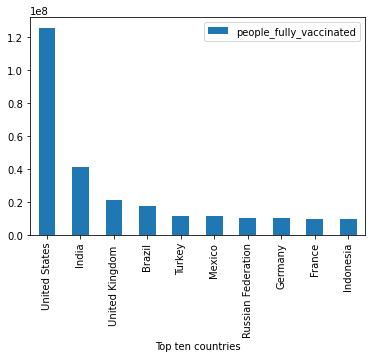

In [43]:
Top_ten_countries1 = pd.DataFrame({'Top ten countries':['United States', 'India', 'United Kingdom ','Brazil','Turkey','Mexico','Russian Federation','Germany','France','Indonesia' ], 'people_fully_vaccinated':[125453423.0,41076994.0,20870453.0,17722720.0,11455389.0,11131624.0 ,10144832.0,9901626.0,9300413.0,9276187.0 ]})
ax = Top_ten_countries1.plot.bar(x='Top ten countries', y='people_fully_vaccinated', rot=90)

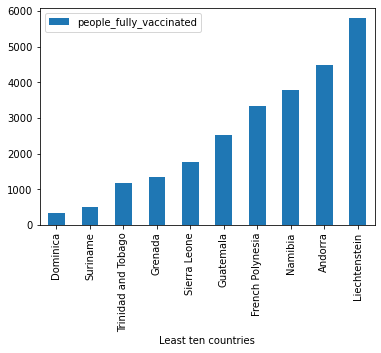

In [44]:
Least_ten_countries1 = pd.DataFrame({'Least ten countries':['Dominica','Suriname','Trinidad and Tobago','Grenada','Sierra Leone','Guatemala','French Polynesia','Namibia','Andorra','Liechtenstein'], 'people_fully_vaccinated':[337.0,502.0,1179.0,1337.0,1781.0,2535.0 ,3324.0,3780.0,4484.0,5804.0 ]})
ax = Least_ten_countries1.plot.bar(x='Least ten countries', y='people_fully_vaccinated', rot=90)


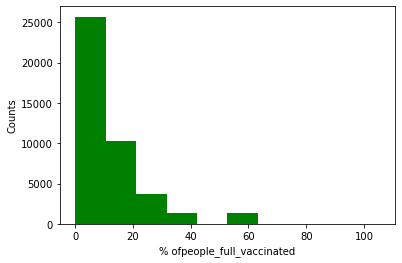

Mean of the study results is: 11.3
Median of the study results is: 7.64
Mode of the study results is: 0    0.02
dtype: float64
NormaltestResult(statistic=27.38026061471764, pvalue=1.1335794153838243e-06)


In [45]:
plt.hist(full_table2['% ofpeople_full_vaccinated'],color='green',bins=10)
        
plt.xlabel('% ofpeople_full_vaccinated')
plt.ylabel('Counts')
plt.show()
print(f"Mean of the study results is: {round(full_table2['% ofpeople_full_vaccinated'].mean(),2)}")
print(f"Median of the study results is: {round(full_table2['% ofpeople_full_vaccinated'].median(),2)}")
print(f"Mode of the study results is: {round(full_table2['% ofpeople_full_vaccinated'].mode(),2)}")
print(st.normaltest(full_table2['% ofpeople_full_vaccinated'].sample(50),))
                              

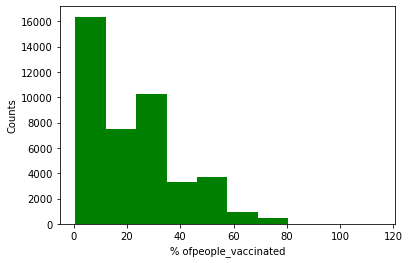

Mean of the study results is: 22.21
Median of the study results is: 18.42
Mode of the study results is: 0    12.68
dtype: float64
NormaltestResult(statistic=3.529929416527, pvalue=0.17119282807051023)


In [46]:
plt.hist(full_table2['% ofpeople_vaccinated'],color='green',bins=10)
        
plt.xlabel('% ofpeople_vaccinated')
plt.ylabel('Counts')
plt.show()
print(f"Mean of the study results is: {round(full_table2['% ofpeople_vaccinated'].mean(),2)}")
print(f"Median of the study results is: {round(full_table2['% ofpeople_vaccinated'].median(),2)}")
print(f"Mode of the study results is: {round(full_table2['% ofpeople_vaccinated'].mode(),2)}")
print(st.normaltest(full_table2['% ofpeople_vaccinated'].sample(50),))
                              

count    4.251900e+04
mean     2.415901e+06
std      5.565176e+06
min      3.370000e+02
25%      7.320500e+04
50%      4.796390e+05
75%      1.709388e+06
max      1.254534e+08
Name: people_fully_vaccinated, dtype: float64

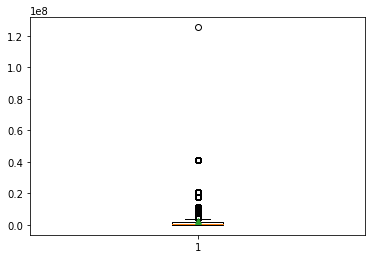

In [47]:
single_dose = (full_table2["people_fully_vaccinated"])

plt.boxplot(single_dose, showmeans=True)
single_dose.describe()

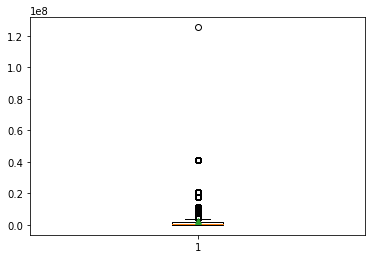

count    4.251900e+04
mean     2.415901e+06
std      5.565176e+06
min      3.370000e+02
25%      7.320500e+04
50%      4.796390e+05
75%      1.709388e+06
max      1.254534e+08
Name: people_fully_vaccinated, dtype: float64

In [48]:
double_dose = full_table2['people_fully_vaccinated']

plt.boxplot(double_dose,showmeans=True)
plt.show()
double_dose.describe()

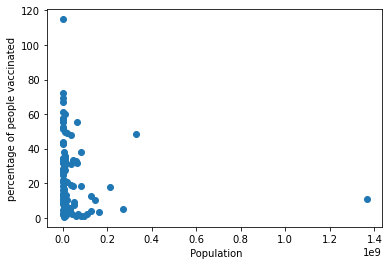

In [49]:
average_pop = full_table1.groupby(full_table1["Country Name"])["2019"].mean()
percentage_single_dose = full_table1.groupby(full_table1["Country Name"])["% ofpeople_vaccinated"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(average_pop, percentage_single_dose)
plt.xlabel(' Population')
plt.ylabel('percentage of people vaccinated')
plt.show()

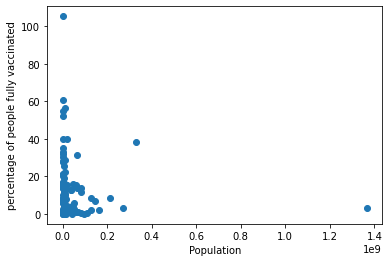

In [51]:
average_pop = full_table2.groupby(full_table2["Country Name"])["2019"].mean()
percentage_double_dose = full_table2.groupby(full_table2["Country Name"])["% ofpeople_full_vaccinated"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(average_pop, percentage_double_dose)
plt.xlabel('Population')
plt.ylabel('percentage of people fully vaccinated')
plt.show()

The r-squared is: 0.9097199815317664
The equation of the regression line is: y = 0.55x + -199264.32


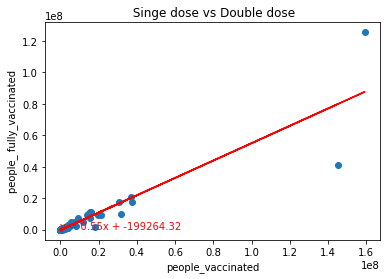

In [116]:
from scipy.stats import linregress
x_values = full_table1["people_vaccinated"]
                       
y_values = full_table1["people_fully_vaccinated"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title(" Singe dose vs Double dose")
plt.xlabel("people_vaccinated")
plt.ylabel("people_ fully_vaccinated")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()